# Heart Failure Prediction 
This is unsupervised learning where we predict heart failure 

In [55]:
#importing necessary libraries 
import os
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", None)
from sklearn import preprocessing
#matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Data Understanding
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help

In [4]:
df=pd.read_csv("./Dataset/heart.csv")

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.shape

(918, 12)

In [7]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [12]:
#Getting categorical data 
string_col=df.select_dtypes("string").columns.to_list()


In [13]:
num_col=df.columns.to_list()
#print the num cols 
for col in string_col:
    num_col.remove(col)
num_col.remove("HeartDisease")


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


## Understanding the attributes of each columns
Age: age of patient[years]<br>
Sex: sex of the patient [M:male, F:Female]<br>
ChestPAinType: chest pain type [TA: Typical Angina , ATA: Atypical Angina , NAP: Non_Anginal Pain, ASY: Asymptomatic]<br>
RestingBP: resting blood pressure [mm Hg]<br>
Cholesterol:serum cholesterol [mm/dl]<br>
FastingECG:resting electrocardiogram results [normal: Normal, ST:having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]<br>
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]<br>
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]<br>
Oldpeak: oldpeak = ST [Numeric value measured in depression]<br>
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]<br>
HeartDisease: output class [1: heart disease, 0: Normal]<br>


# First Question should be why do we need this ??
Out Come of this phase is as given below :<br>

Understanding the given dataset and helps clean up the given dataset.<br>
It gives you a clear picture of the features and the relationships between them.<br>
Providing guidelines for essential variables and leaving behind/removing non-essential variables.<br>
Handling Missing values or human error.<br>
Identifying outliers.<br>
EDA process would be maximizing insights of a dataset.<br>
This process is time-consuming but very effective,<br>

In [22]:
#Feature Engineering using get dummies 
encod_df=pd.get_dummies(df,columns=["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]) 
 

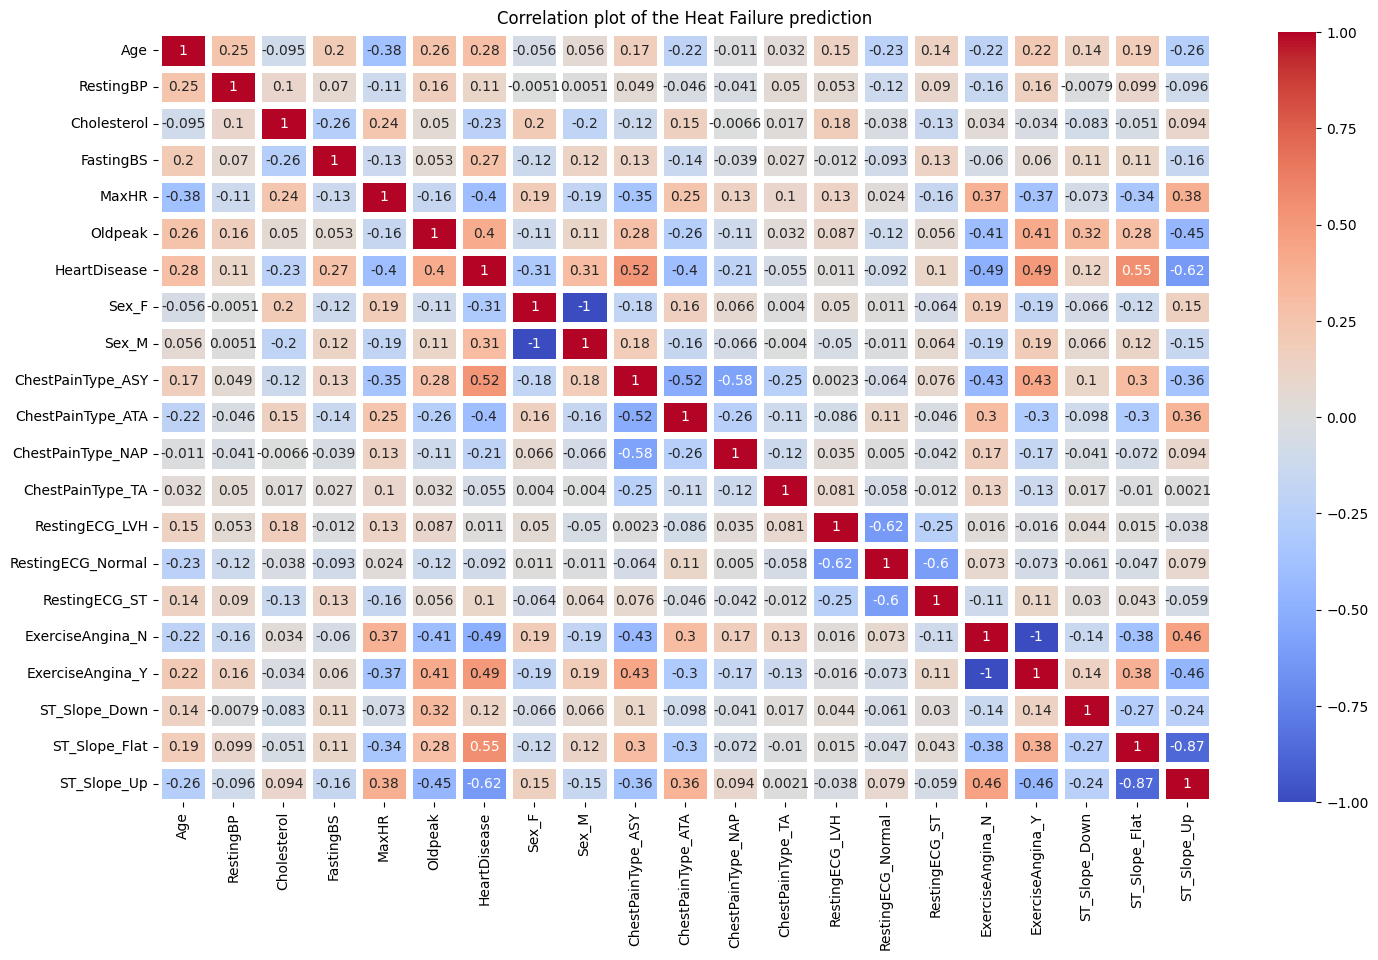

In [27]:
#finding the correlation 

correlation_matrix=encod_df.corr()
plt.figure(figsize=(17,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm', linewidths=5)
plt.title("Correlation plot of the Heat Failure prediction")
plt.show()


In [29]:
#show the distribution of heart Diseases with respect to male and female
fig=px.histogram(df,
                 x="HeartDisease",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

## Above figuire analysis 
Men who are attacked with heart disease is higher than females 
Also this could mean more men are in our survey compared to females

In [30]:
#show the distribution of Chest pain with respect to male and female
fig=px.histogram(df,
                 x="ChestPainType",
                 color="Sex",
                 hover_data=df.columns,
                 title="Types of Chest Pain",
                 )
fig.show()

In [32]:
fig=px.histogram(df,
                 x="Sex",
                 hover_data=df.columns,
                 title="Sex Ratio in the Data")
fig.show()

In [33]:
fig=px.histogram(
    df,
    x="RestingECG",
    hover_data=df.columns,
    title="Distribution of Resting ECG"
)
fig.show()

[]

<Figure size 1500x1000 with 0 Axes>

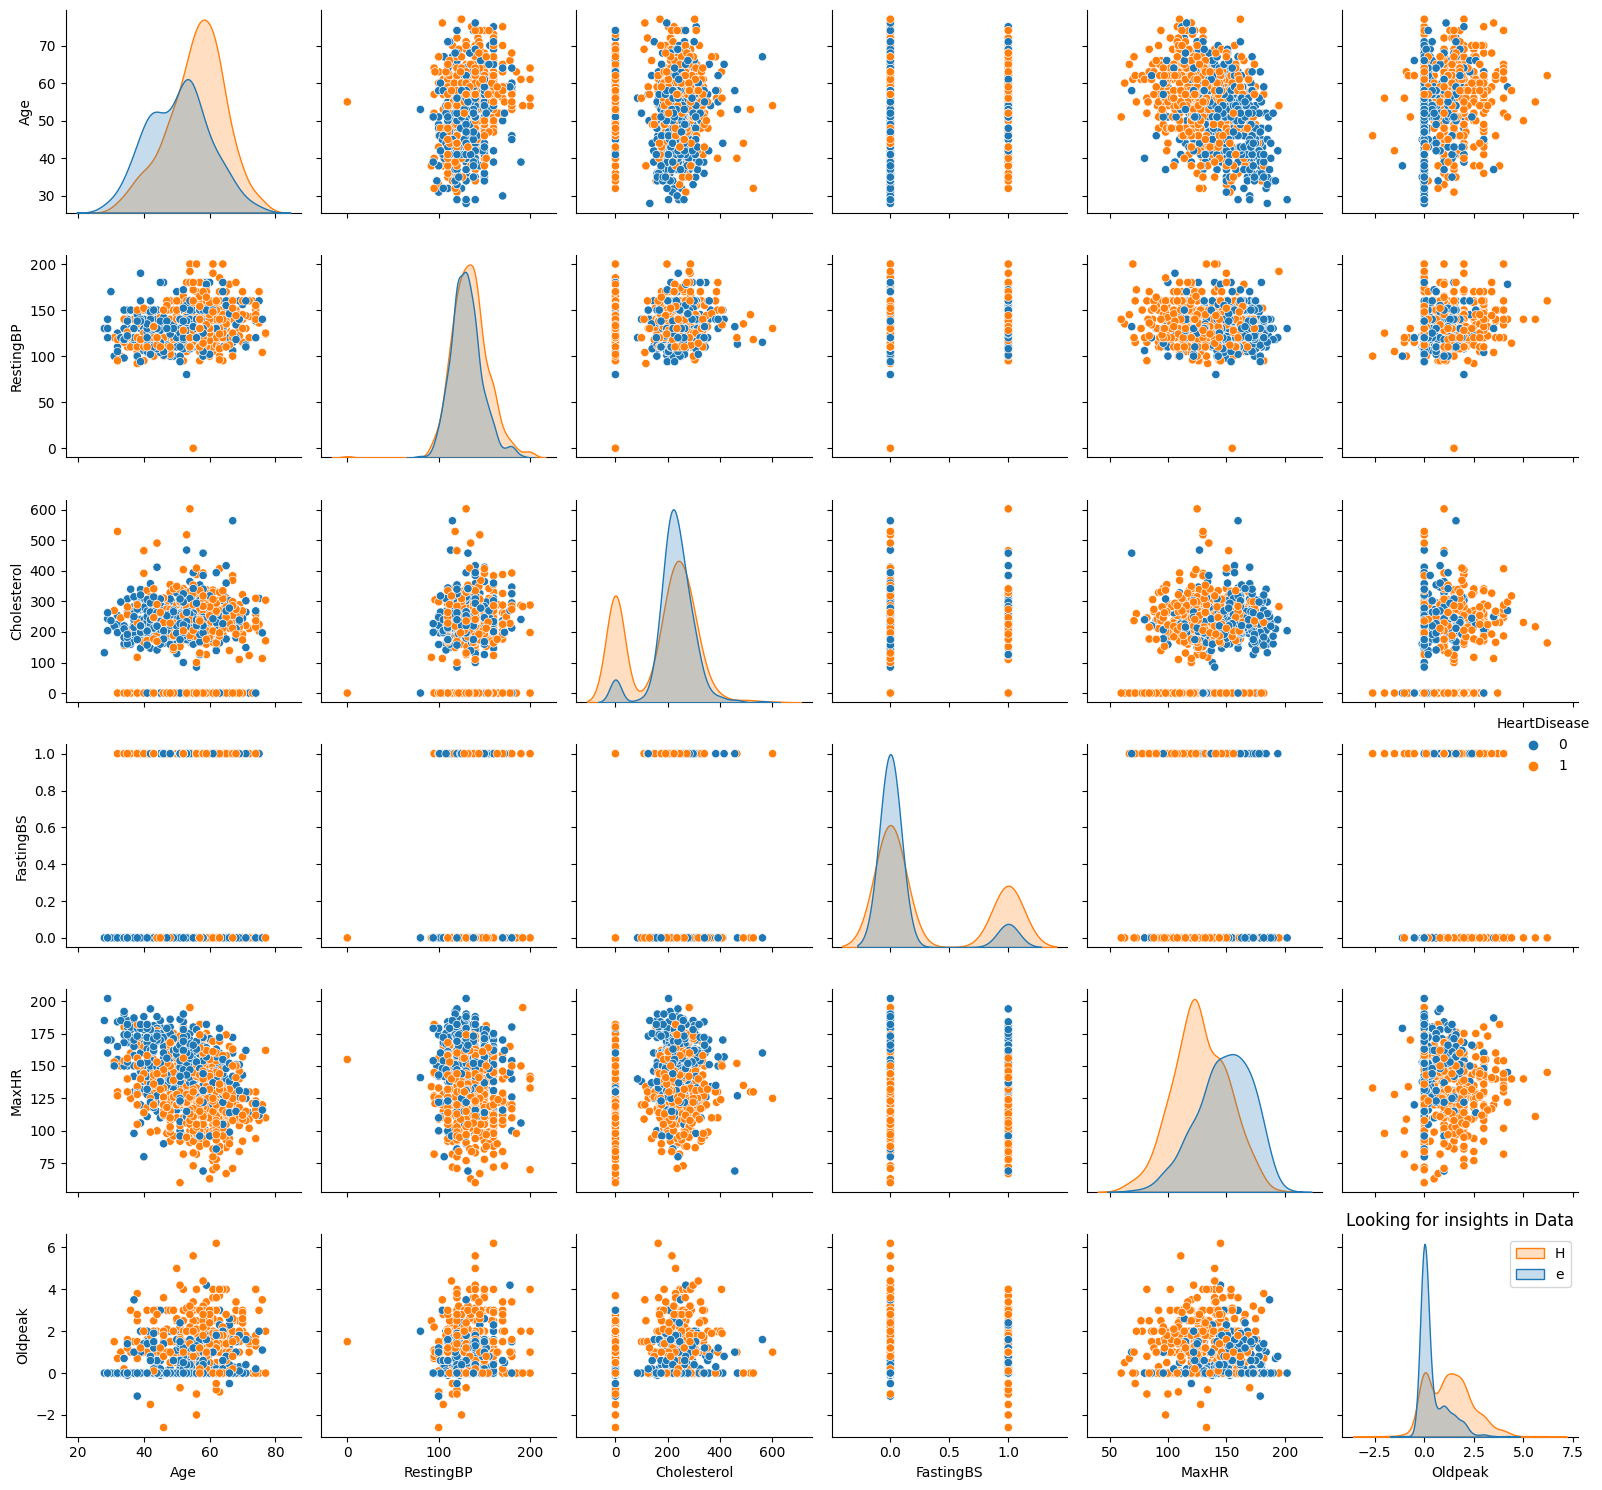

In [36]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="HeartDisease")
plt.title("Looking for insights in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

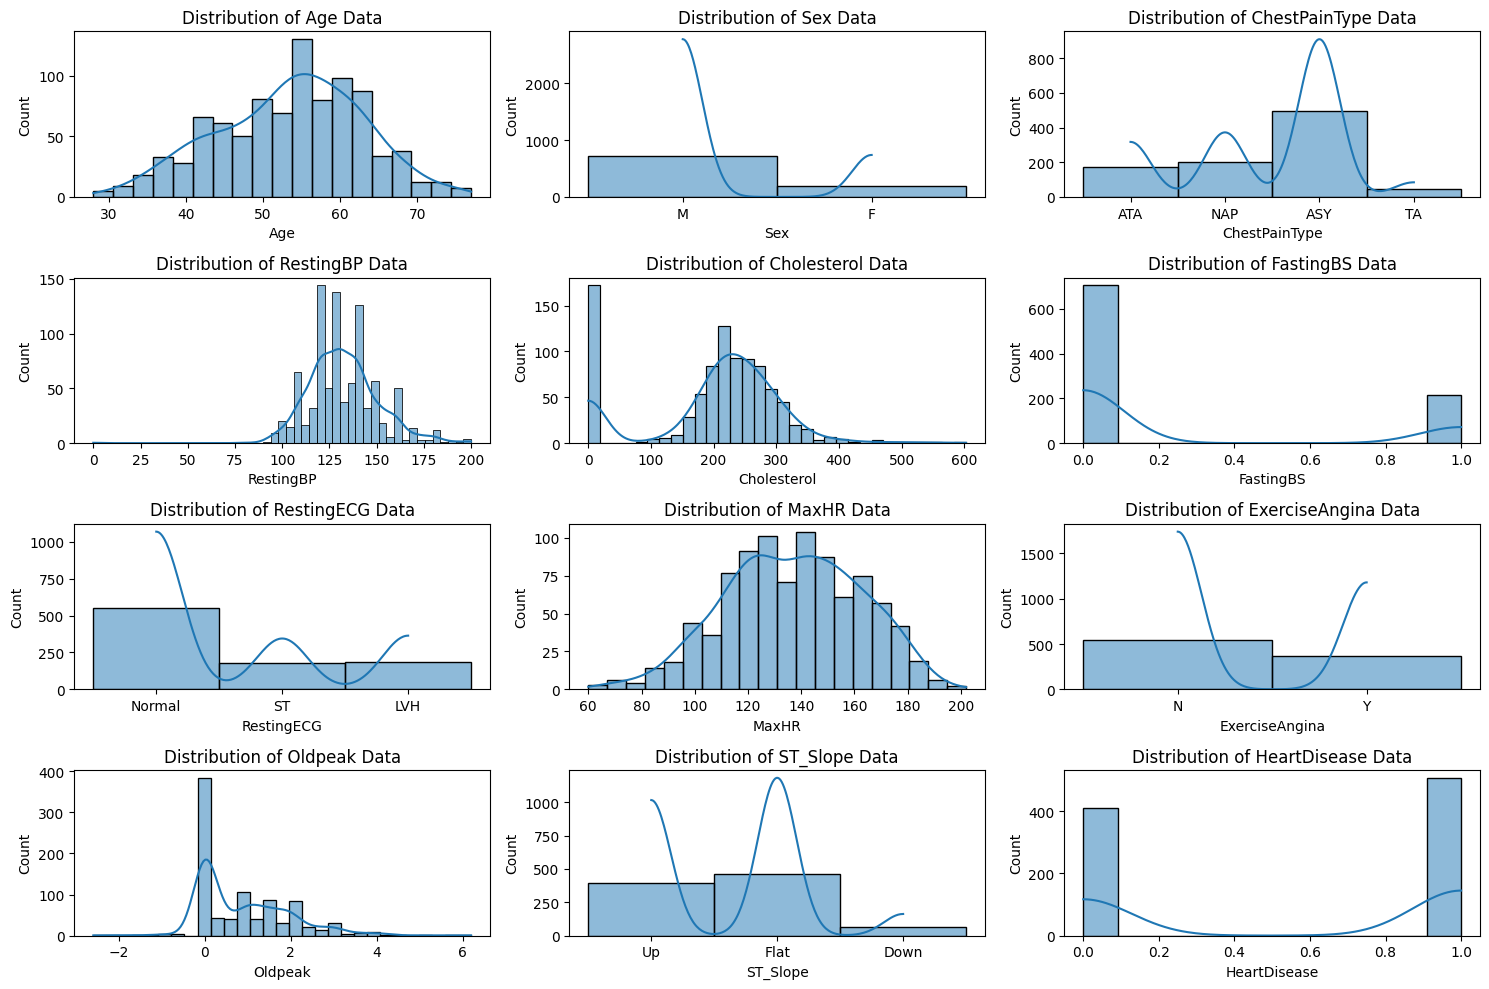

In [39]:
plt.figure(figsize=(15,10))
for i,col in enumerate (df.columns, 1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [41]:
'''Box plot is good for checking outliers
it helps getting  minimum , first quartile ,Median , third Quartile, Maximum'''
fig=px.box(df,y="Age", x="HeartDisease", title=f"Distribution of Age")
fig.show()


In [42]:
fig=px.box(df,y="RestingBP", x="HeartDisease", title=f"Distribution on of RestingBP", color="Sex")
fig.show()

In [43]:
fig=px.box(df,y="Cholesterol", x="HeartDisease", title=f"Distibution of Cholesterol")
fig .show()


In [44]:
fig=px.box(df,y="Oldpeak",x="HeartDisease", title=f"Distribution of Oldpeak")
fig.show()

In [45]:
fig=px.box(df,y="MaxHR", x="HeartDisease", title=f"Distribution of MaxHR")
fig.show()

# Data Preprocessing 
This process involes handling Null Values, Feature Scaling , Handling Categorical Values

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [48]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# scaling 
When working eith outliers we can  use Robust Scaling for Scaling our data , it scales fatures usikng statistics that are robust to outliers

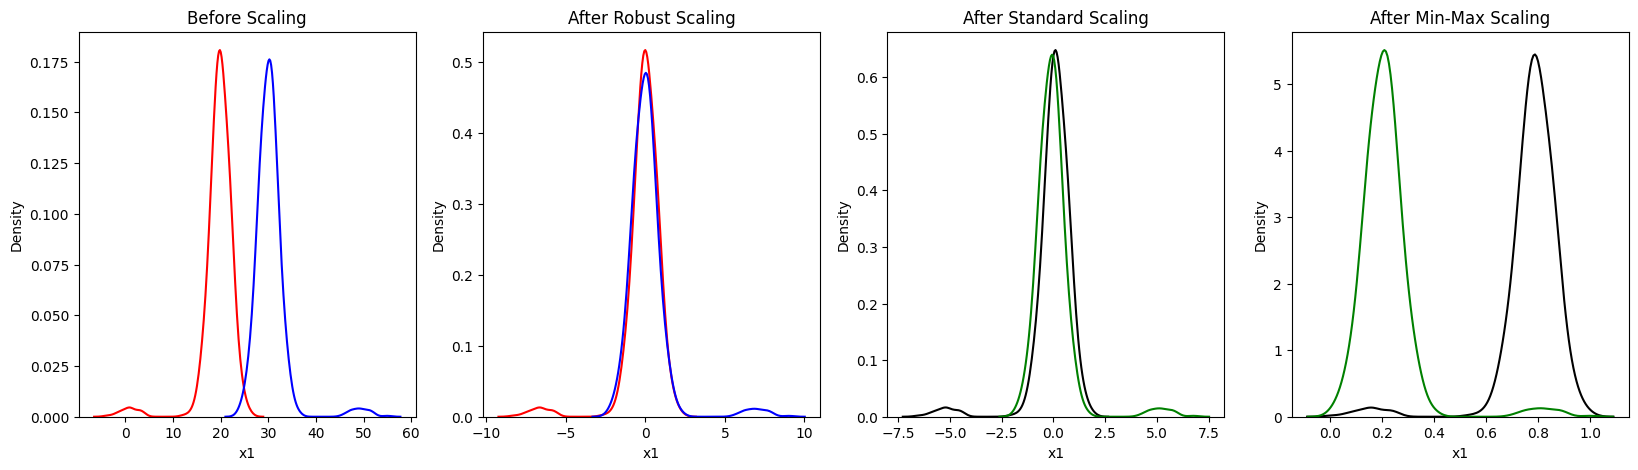

In [50]:
# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal
 
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])
 
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])
 
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])
 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
 
sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
 
sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')
 
sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')
 
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()

In [51]:
df[string_col].head()
for col in string_col:
    print(f"The distribution of categorical valeus in the {col} is : ")
    print(df[col].value_counts())

In [52]:
# As we will be using both types of approches for demonstration lets do First Label Ecoding 
# which will be used with Tree Based Algorthms
df_tree = df.apply(LabelEncoder().fit_transform)
df_tree.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


In [61]:
# As we will be using both types of approches for demonstration lets do First Label Ecoding 
# which will be used with Tree Based Algorthms
df_tree = df.apply(LabelEncoder().fit_transform)
df_tree.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


In [62]:
y=df_tree['HeartDisease']

In [64]:
# Getting the target column at the end

X=df_tree.drop('HeartDisease',axis=1)
#splitting between test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model=LogisticRegression()
#training model
model.fit(X_train,y_train)
#making prediction
y_pred=model.predict(X_test)
#Evaluate the performance of the model 
accuracy=accuracy_score(y_test,y_pred)


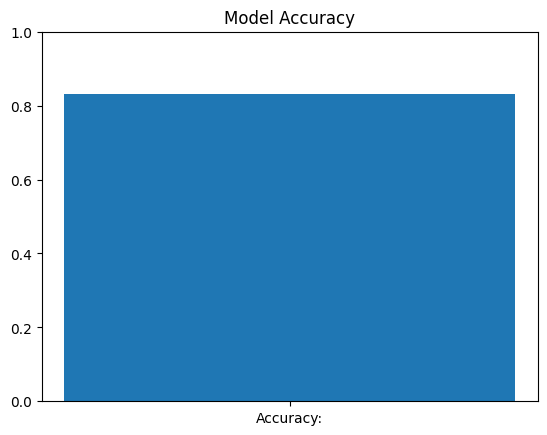

accuracy_score is 0.8315217391304348


In [68]:
plt.bar(['Accuracy:'],[accuracy])
plt.ylim(0,1)
plt.title('Model Accuracy')
plt.show()
print('accuracy_score is',accuracy)

In [71]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier()
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)
accuracy1=accuracy_score(y_test,y_pred1)
print("accuracy:",accuracy1)



accuracy: 0.7934782608695652
